In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

from graph_embedding_continuity import *

In [2]:
N = 50
# Barabasi-Albert parameter
m = 5
# number of edge(s) to remove
k_remove = 1

## Discontinuous embedding under removal of an edge that disconnects the graph or a random intra-community edge

In [3]:
# generate a random graph that bridges to clusters
G1 = nx.barabasi_albert_graph(N, 2)
G2 = nx.barabasi_albert_graph(N, 2)

# relabel nodes of G2
d = {}
for v in G1.nodes:
    d[v] = N+v
G2 = nx.relabel_nodes(G2, d)

G = nx.union(G1, G2)

G.add_edge(N-1, N)
# add some random weights on each edge
for _, _, d in G.edges(data=True):
    d['weight'] = np.random.rand()
    
# save layout
pos = nx.spring_layout(G)

# create new graphs by removing either the bridge edge or an intra-community edge 
# (for instance the first one in the edge list), in different order.
u_removed, v_removed = list(G.edges)[0]

G1 = deepcopy(G)
G2 = deepcopy(G)
# remove bridge
G1.remove_edge(N-1, N)
# remove some edge
G2.remove_edge(u_removed, v_removed)

G12 = deepcopy(G1)
G21 = deepcopy(G2)
# remove some edge
G12.remove_edge(u_removed, v_removed)
# remove bridge
G21.remove_edge(N-1, N)

/home/sauxpa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


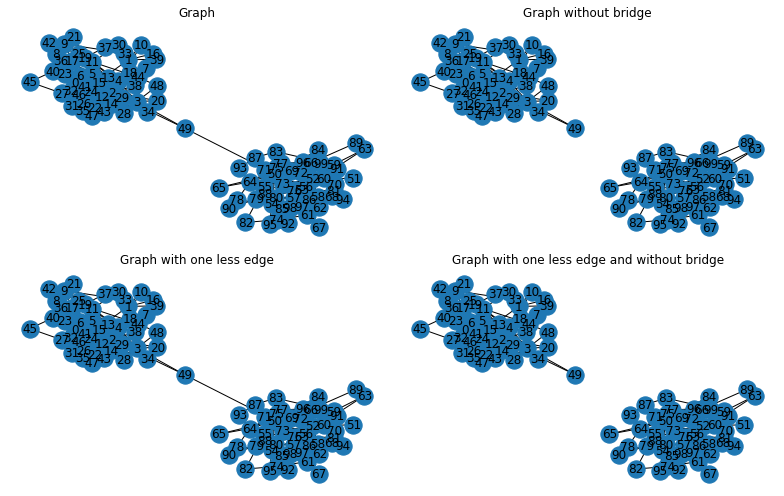

In [4]:
# plot the graph
fig, axes = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

ax = axes[0, 0]
nx.draw_networkx(G, pos=pos, ax=ax)
ax.set_title('Graph')
ax.axis('off')

ax = axes[0, 1]
nx.draw_networkx(G1, pos=pos, ax=ax)
ax.set_title('Graph without bridge')
ax.axis('off')

ax = axes[1, 0]
nx.draw_networkx(G2, pos=pos, ax=ax)
ax.set_title('Graph with one less edge')
ax.axis('off')

ax = axes[1, 1]
nx.draw_networkx(G12, pos=pos, ax=ax)
ax.set_title('Graph with one less edge and without bridge')
ax.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('ba_bridge_graphs_commute.eps')

### Does this diagram "commutes"?

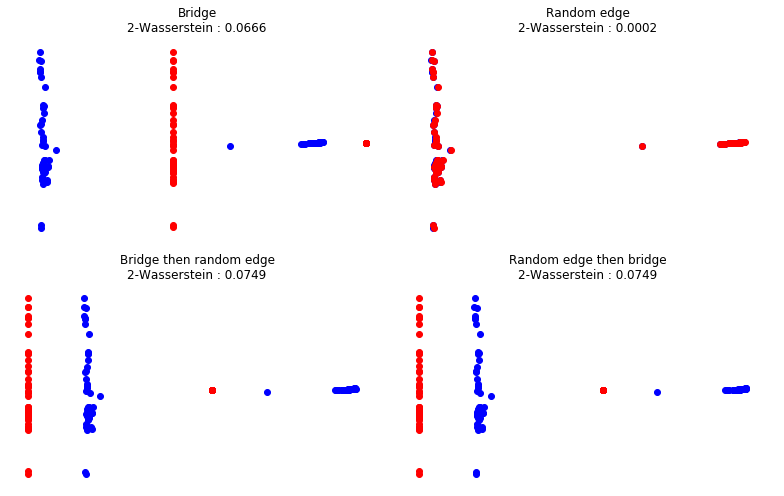

In [5]:
emb, _ = eigenmap_embedding(G, k=3, normalize=True)
emb_1, _ = eigenmap_embedding(G1, k=3, normalize=True)
emb_2, _ = eigenmap_embedding(G2, k=3, normalize=True)
emb_12, _ = eigenmap_embedding(G12, k=3, normalize=True)
emb_21, _ = eigenmap_embedding(G21, k=3, normalize=True)

emb = emb[:, 1:]
emb_1 = emb_1[:, 1:]
emb_2 = emb_2[:, 1:]
emb_12 = emb_12[:, 1:]
emb_21 = emb_21[:, 1:]

# plot the graph
fig, axes = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

wass_1 = wasserstein_metric(emb, emb_1)
wass_2 = wasserstein_metric(emb, emb_2)
wass_12 = wasserstein_metric(emb, emb_12)
wass_21 = wasserstein_metric(emb, emb_21)

ax = axes[0, 0]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_1[:, 0], emb_1[:, 1], label='removed', color='r')
ax.set_title('Bridge\n2-Wasserstein : {:.4f}'.format(wass_1))
ax.axis('off')

ax = axes[0, 1]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_2[:, 0], emb_2[:, 1], label='removed', color='r')
ax.set_title('Random edge\n2-Wasserstein : {:.4f}'.format(wass_2))
ax.axis('off')

ax = axes[1, 0]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_12[:, 0], emb_12[:, 1], label='removed', color='r')
ax.set_title('Bridge then random edge\n2-Wasserstein : {:.4f}'.format(wass_12))
ax.axis('off')

ax = axes[1, 1]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_21[:, 0], emb_21[:, 1], label='removed', color='r')
ax.set_title('Random edge then bridge\n2-Wasserstein : {:.4f}'.format(wass_21))
ax.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('eigenmap_commute.eps')

### Conclusion

Eigenmap being a matrix factorization method, it does not care in what order edges are removed, the graph Laplacian is the same in either case. Numerically, the resulting embedding is the same regardless of which sequence of edge removals is applied.